# **IMPORT LIBRARY**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# **LOADING DATASET**

In [3]:
graduate_data_test = pd.read_excel('https://docs.google.com/uc?export=download&id=1wu8z9GPc9dYFkNsRBPkD5s0rkJ75RICi')
graduate_data_train = pd.read_excel('https://docs.google.com/uc?export=download&id=12yjESOJMPM9iKne_SrO6Ob44C5HmNz3X')

In [4]:
graduate_data_test.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT


In [5]:
graduate_data_train.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


In [6]:
graduate_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              145 non-null    object 
 1   JENIS KELAMIN     145 non-null    object 
 2   STATUS MAHASISWA  145 non-null    object 
 3   UMUR              145 non-null    int64  
 4   STATUS NIKAH      145 non-null    object 
 5   IPS 1             145 non-null    float64
 6   IPS 2             145 non-null    float64
 7   IPS 3             145 non-null    float64
 8   IPS 4             145 non-null    float64
 9   IPS 5             145 non-null    float64
 10  IPS 6             145 non-null    float64
 11  IPS 7             145 non-null    float64
 12  IPS 8             141 non-null    float64
 13  IPK               142 non-null    float64
 14  STATUS KELULUSAN  145 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 17.1+ KB


In [7]:
graduate_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB


# **DATA CLEANING**

In [8]:
print(graduate_data_train['JENIS KELAMIN'].unique())
print(graduate_data_train['STATUS MAHASISWA'].unique())
print(graduate_data_train['STATUS NIKAH'].unique())
print(graduate_data_train['STATUS KELULUSAN'].unique())

['PEREMPUAN' 'LAKI - LAKI']
['BEKERJA' 'MAHASISWA']
['BELUM MENIKAH' 'MENIKAH']
['TERLAMBAT' 'TEPAT']


# **DROPPING COLUMNS**

In [9]:
#Menghapus komom yang tidak digunakan
graduate_data_train.drop(columns=['STATUS NIKAH'], inplace=True)
graduate_data_test.drop(columns=['STATUS NIKAH'], inplace=True)

In [10]:
graduate_data_train = graduate_data_train.dropna(subset=['IPS 8'])
graduate_data_train = graduate_data_train.dropna(subset=['IPK '])

In [11]:
graduate_data_test = graduate_data_test.dropna(subset=['IPS 8'])
graduate_data_test = graduate_data_test.dropna(subset=['IPK '])

In [12]:
#Kolom yang digunakan untuk korelasi
graduate_data_train = graduate_data_train.drop(columns=['NAMA'])
graduate_data_train.head()

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,PEREMPUAN,BEKERJA,28,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,PEREMPUAN,MAHASISWA,32,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,PEREMPUAN,BEKERJA,29,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,PEREMPUAN,MAHASISWA,27,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,PEREMPUAN,BEKERJA,29,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


In [13]:
#Kolom yang digunakan untuk korelasi
graduate_data_test = graduate_data_test.drop(columns=['NAMA'])
graduate_data_test.head()

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,LAKI - LAKI,MAHASISWA,24,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
2,LAKI - LAKI,MAHASISWA,29,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,LAKI - LAKI,MAHASISWA,27,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,PEREMPUAN,MAHASISWA,25,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT
5,LAKI - LAKI,MAHASISWA,24,3.10,2.98,3.17,3.25,3.41,3.08,3.43,3.00,3.23,TEPAT


In [14]:
replacements = {
    'JENIS KELAMIN' : {'LAKI - LAKI' : 1, 'PEREMPUAN' : 0},
    'STATUS MAHASISWA' : {'MAHASISWA' : 0, 'BEKERJA' : 1},
    'STATUS KELULUSAN' : {'TERLAMBAT' : 1, 'TEPAT' : 0}
}

graduate_data_train = graduate_data_train.replace(replacements, inplace=False)
graduate_data_train.head()

/tmp/ipython-input-2311377347.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  graduate_data_train = graduate_data_train.replace(replacements, inplace=False)


,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,0,1,28,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,1
1,0,0,32,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,1
2,0,1,29,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,1
3,0,0,27,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,1
4,0,1,29,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,1


In [15]:
graduate_data_test = graduate_data_test.replace(replacements, inplace=False)
graduate_data_test.head()

/tmp/ipython-input-2929382760.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  graduate_data_test = graduate_data_test.replace(replacements, inplace=False)


,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,1,0,24,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,0
2,1,0,29,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,0
3,1,0,27,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,0
4,0,0,25,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,0
5,1,0,24,3.10,2.98,3.17,3.25,3.41,3.08,3.43,3.00,3.23,0


In [16]:
graduate_data_test.isnull().sum()

,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0
IPS 6,0
IPS 7,0


In [17]:
graduate_data_train.isnull().sum()

,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0
IPS 6,0
IPS 7,0


# **ANALISIS KORELASI FITUR**

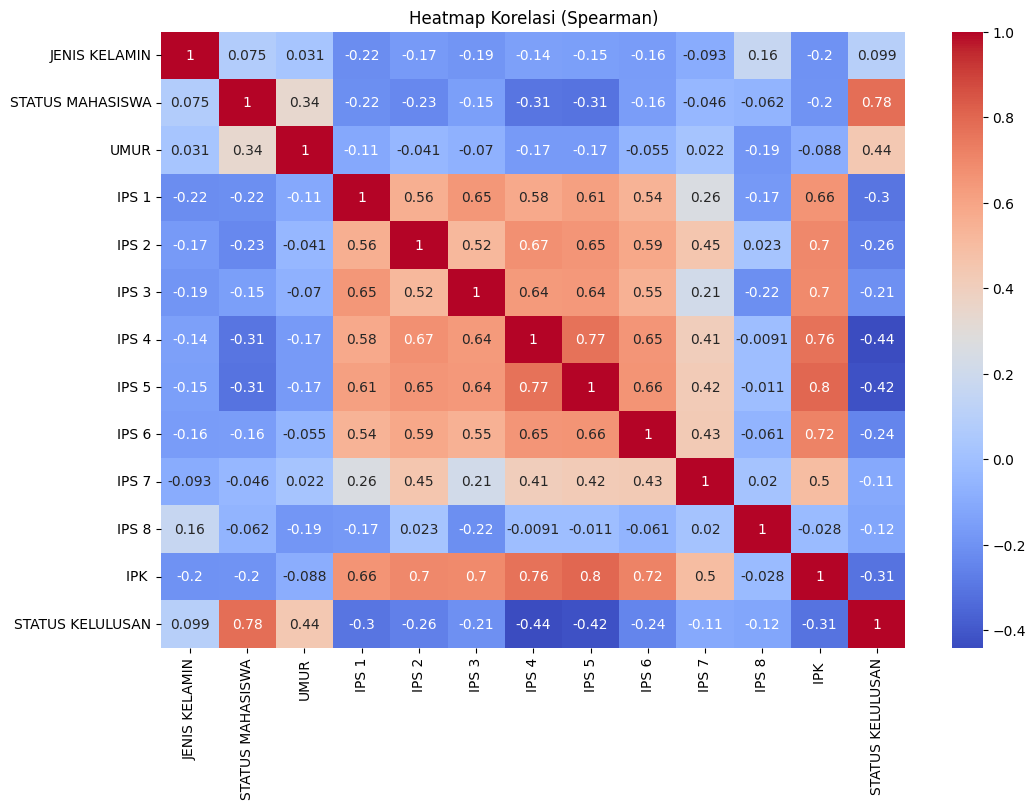

In [19]:
#Menghitung matriks korelasi menggunakan spearman
correlation_matrix = graduate_data_train.corr(method='spearman')

#Membuat Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap Korelasi (Spearman)')
plt.show()

/tmp/ipython-input-2131832753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'STATUS KELULUSAN', data=graduate_data_test, palette='Set2')


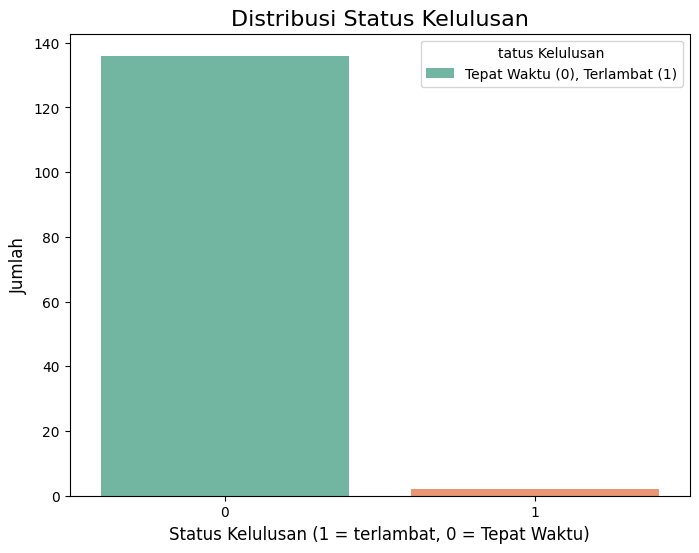

In [ ]:
#Membuat diagram batang untuk status kelulusan
plt.figure(figsize=(8, 6))
sns.countplot(x= 'STATUS KELULUSAN', data=graduate_data_test, palette='Set2')

#Menambahkan Judul Label
plt.title('Distribusi Status Kelulusan', fontsize=16)
plt.xlabel('Status Kelulusan (1 = terlambat, 0 = Tepat Waktu)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

#Menambahkan legend (adjusted labels for correctness)
plt.legend(title='tatus Kelulusan', labels=['Tepat Waktu (0), Terlambat (1)'], loc='upper right')

#Menampilkan plot
plt.show()


/tmp/ipython-input-1066440243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'STATUS KELULUSAN', data=graduate_data_train, palette='Set2')


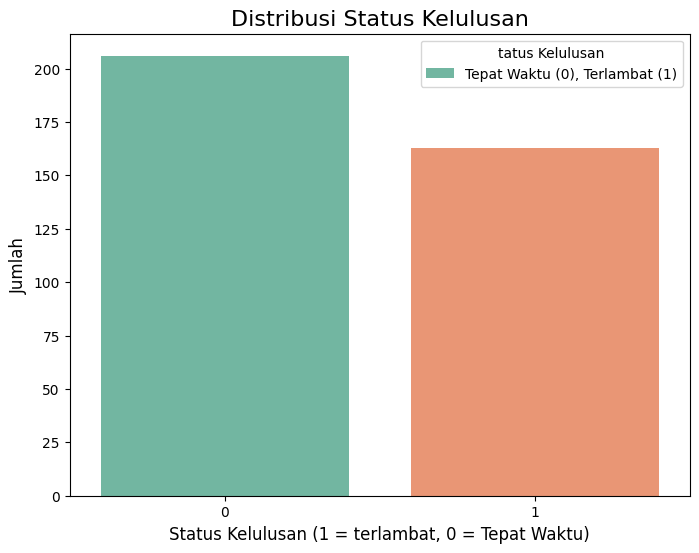

In [ ]:
#Membuat diagram batang untuk status kelulusan
plt.figure(figsize=(8, 6))
sns.countplot(x= 'STATUS KELULUSAN', data=graduate_data_train, palette='Set2')

#Menambahkan Judul Label
plt.title('Distribusi Status Kelulusan', fontsize=16)
plt.xlabel('Status Kelulusan (1 = terlambat, 0 = Tepat Waktu)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

#Menambahkan legend (adjusted labels for correctness)
plt.legend(title='tatus Kelulusan', labels=['Tepat Waktu (0), Terlambat (1)'], loc='upper right')

#Menampilkan plot
plt.show()

# **SPILT DAN NORMALISASI DATA**

In [20]:
#Data yang dilatih
x_train = graduate_data_train.drop(columns=['STATUS KELULUSAN'])
y_train = graduate_data_train['STATUS KELULUSAN']

#data validasinya
x_test = graduate_data_test.drop(columns=['STATUS KELULUSAN'])
y_test = graduate_data_test['STATUS KELULUSAN']

#Normalisasi features after spliting
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **Mengatasi Ketidakseimbangan Kelas dengan SMOTE**

In [51]:
print("Before SMOTE:")
print(y_test.value_counts())

sm = SMOTE(random_state=42, k_neighbors=1)
x_test_smote, y_test_smote = sm.fit_resample(x_test_scaled, y_test)

print("\nAfter SMOTE:")
print(y_test_smote.value_counts())

Before SMOTE:
STATUS KELULUSAN
0    136
1      2
Name: count, dtype: int64

After SMOTE:
STATUS KELULUSAN
0    136
1    136
Name: count, dtype: int64


# **Menentukan Parameter Terbaik (Hyperparameter Tuning)**

In [52]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(x_test_smote, y_test_smote)

print("Best Parameters:", grid.best_params_)
print("Best Score (CV):", grid.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best Score (CV): 0.9962962962962962


# **Melatih Model KNN Terbaik dan Melakukan Prediks**

In [53]:
best_knn = grid.best_estimator_
best_knn.fit(x_test_smote, y_test_smote)

#Prediksi
y_pred = best_knn.predict(x_test_scaled)

# **Evaluasi Model dengan Classification Report**

In [56]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00         2

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



# **Evaluasi dengan Confusion Matrix**

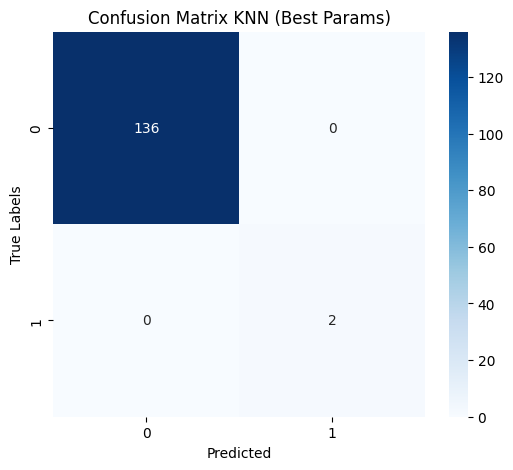

In [59]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix KNN (Best Params)')
plt.xlabel('Predicted')
plt.ylabel('True Labels')
plt.show()

# **Validasi Model dengan Cross Validation**

In [63]:
cv_scores = cross_val_score(best_knn, x_test_smote, y_test_smote, cv=5)
print("Cross-Validation Scores:", cv_scores.mean())
print("Std Dev:", cv_scores.std())

Cross-Validation Scores: 0.9962962962962962
Std Dev: 0.007407407407407395


# **Menentukan Nilai K Optimal dengan Elbow Method**

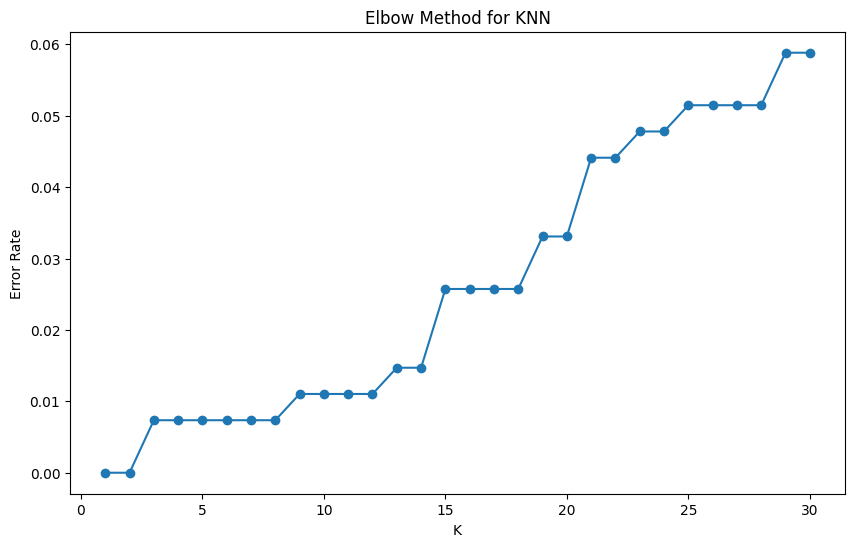

In [67]:
errors = []

for k in range(1, 31):
  knn_temp = KNeighborsClassifier(n_neighbors=k)
  knn_temp.fit(x_test_smote, y_test_smote)
  pred = knn_temp.predict(x_test_smote)
  errors.append(np.mean(pred != y_test_smote))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), errors, marker='o')
plt.title('Elbow Method for KNN')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

Note : Data Test dan Train terbalik jadi penggunaan model banyak menggunakan data test, sebab kalau pakai data train hasilnya gak sesuai dengan praktikum. (note tambahan : terbalik dari data yang dikasih karena saya tidak mengubah2 data)